# Clustering Part 2

In [115]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

#DBSCAN Algorithm

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) is a commonly used unsupervised clustering algorithm. DBSCAN does not need to specify the number of clusters. It can automatically detect the number of clusters based on your input data and parameters. More importantly, DBSCAN can find arbitrary shape clusters that k-means are not able to find.

# Algorithm:
a. The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).

b. If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.

c. The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point



A. **Generate "N" spherical training data points.**


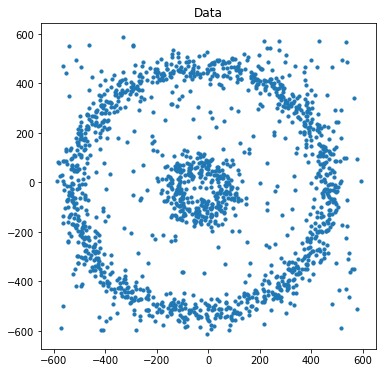

In [116]:
#DBSCAN
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
np.random.seed(42)
colors = ['r','b','g','y']
markers = ['*','x','.','+']
def Circle(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]
#data generation
# Creating data points in the form of a circle
df=pd.DataFrame(Circle(500,1000))
df=df.append(Circle(100,300))
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],s=10)
plt.title('Data')
plt.show()


B. **Perform DBSCAN Algorithm on the above generated data to obtain clusters**

number of cluster found:  2
Counter:
[[   0    1    2]
 [ 224 1021  355]]
numrer of outliers found:  224


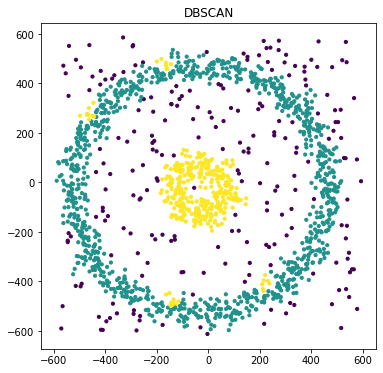

In [117]:
## Write your code here
data=df.to_numpy()

# parameters for dbscan
eps = 30
min_pts = 6




# functn to return index of eps points
def idx_eps_pts(idx,data,eps):
    dist = np.sqrt((data[:,0]-data[idx,0])**2+(data[:,1]-data[idx,1])**2)
    eps_idx = [i for i,v in enumerate(dist) if v <= eps]
    return eps_idx

#declaring labels array
labels = np.zeros(len(data[:,0]))
# index array corresponding to each array
index = np.arange(len(data[:,0]))
# cluster init
n_cls = 1


# looping over index
for idx in index:
    if labels[idx]==0: # check if alreeady labeled
        tmp1 = idx_eps_pts(idx,data,eps); # index of eps points close to idx
        i=0; # looping over tmp1 points
        while(i<len(tmp1)):
            tmp2 = idx_eps_pts(tmp1[i],data,eps); # tmp2 = eps points of tmp1 points
            if len(tmp2)>=min_pts and np.sum(labels[tmp2]==0): # check if tmp2  is core or not
                # if core update label
                labels[tmp2] = n_cls
                labels[tmp1] = n_cls
                for j in tmp2: #loop to chose next point in eps points of tmp2
                    tmp3 = idx_eps_pts(j,data,eps)
                    if np.sum(labels[tmp3]==0): # check if it has unlabelled pts
                        tmp1 = np.append(tmp1,tmp3); # if core point append tmp3 to tmp1
                        break
            i+=1; # increamenting loop argument
        if (len(tmp1)>=min_pts): # changing cluster label if previous loop is exited and new point is core point
            n_cls+=1


# printing values            
print('number of cluster found: ',n_cls-1)
print('Counter:')
print((np.asarray(np.unique(labels.astype(int),return_counts=True))))
print('numrer of outliers found: ',(np.asarray(np.unique(labels.astype(int),return_counts=True)))[1,0])


plt.subplots(figsize=(6,6))
plt.scatter(data[:,0],data[:,1],c=labels,s=10,cmap = 'viridis')
plt.title("DBSCAN")
plt.show()


C. **Experiment by varying the number of min points and epsilon radius and plot your observations**

number of cluster found:  30
Counter:
[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30]
 [657  35   4  20 106  18  13  15  17  17  16  20  12  11  25  26  16  29
   39  36  30  43   6  11  37  19  13  13  12 214  70]]
numrer of outliers found:  657


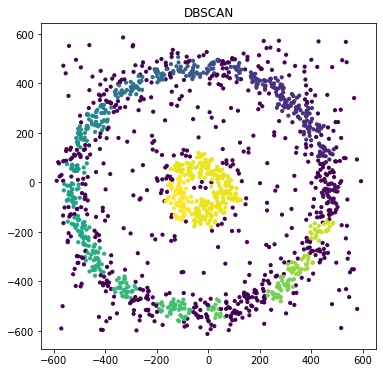

In [118]:
data=df.to_numpy()

# parameters for dbscan
eps = 25
min_pts = 10




# functn to return index of eps points
def idx_eps_pts(idx,data,eps):
    dist = np.sqrt((data[:,0]-data[idx,0])**2+(data[:,1]-data[idx,1])**2)
    eps_idx = [i for i,v in enumerate(dist) if v <= eps]
    return eps_idx

#declaring labels array
labels = np.zeros(len(data[:,0]))
# index array corresponding to each array
index = np.arange(len(data[:,0]))
# cluster init
n_cls = 1


# looping over index
for idx in index:
    if labels[idx]==0: # check if alreeady labeled
        tmp1 = idx_eps_pts(idx,data,eps); # index of eps points close to idx
        i=0; # looping over tmp1 points
        while(i<len(tmp1)):
            tmp2 = idx_eps_pts(tmp1[i],data,eps); # tmp2 = eps points of tmp1 points
            if len(tmp2)>=min_pts and np.sum(labels[tmp2]==0): # check if tmp2  is core or not
                # if core update label
                labels[tmp2] = n_cls
                labels[tmp1] = n_cls
                for j in tmp2: #loop to chose next point in eps points of tmp2
                    tmp3 = idx_eps_pts(j,data,eps)
                    if np.sum(labels[tmp3]==0): # check if it has unlabelled pts
                        tmp1 = np.append(tmp1,tmp3); # if core point append tmp3 to tmp1
                        break
            i+=1; # increamenting loop argument
        if (len(tmp1)>=min_pts): # changing cluster label if previous loop is exited and new point is core point
            n_cls+=1


# printing values            
print('number of cluster found: ',n_cls-1)
print('Counter:')
print((np.asarray(np.unique(labels.astype(int),return_counts=True))))
print('numrer of outliers found: ',(np.asarray(np.unique(labels.astype(int),return_counts=True)))[1,0])


plt.subplots(figsize=(6,6))
plt.scatter(data[:,0],data[:,1],c=labels,s=10,cmap = 'viridis')
plt.title("DBSCAN")
plt.show()

number of cluster found:  40
Counter:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40]
 [  80 1079    3    4    2    9    2    2    2  329    3    4    6    2
     3    2    6    2    5    5    2    3    2    3    2    3    2    3
     2    2    4    2    2    3    2    2    2    2    3    2    2]]
numrer of outliers found:  80


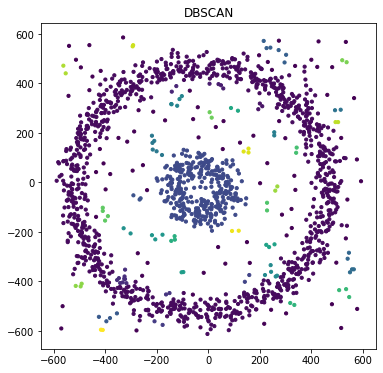

In [119]:
data=df.to_numpy()

# parameters for dbscan
eps = 35
min_pts = 2




# functn to return index of eps points
def idx_eps_pts(idx,data,eps):
    dist = np.sqrt((data[:,0]-data[idx,0])**2+(data[:,1]-data[idx,1])**2)
    eps_idx = [i for i,v in enumerate(dist) if v <= eps]
    return eps_idx

#declaring labels array
labels = np.zeros(len(data[:,0]))
# index array corresponding to each array
index = np.arange(len(data[:,0]))
# cluster init
n_cls = 1


# looping over index
for idx in index:
    if labels[idx]==0: # check if alreeady labeled
        tmp1 = idx_eps_pts(idx,data,eps); # index of eps points close to idx
        i=0; # looping over tmp1 points
        while(i<len(tmp1)):
            tmp2 = idx_eps_pts(tmp1[i],data,eps); # tmp2 = eps points of tmp1 points
            if len(tmp2)>=min_pts and np.sum(labels[tmp2]==0): # check if tmp2  is core or not
                # if core update label
                labels[tmp2] = n_cls
                labels[tmp1] = n_cls
                for j in tmp2: #loop to chose next point in eps points of tmp2
                    tmp3 = idx_eps_pts(j,data,eps)
                    if np.sum(labels[tmp3]==0): # check if it has unlabelled pts
                        tmp1 = np.append(tmp1,tmp3); # if core point append tmp3 to tmp1
                        break
            i+=1; # increamenting loop argument
        if (len(tmp1)>=min_pts): # changing cluster label if previous loop is exited and new point is core point
            n_cls+=1


# printing values            
print('number of cluster found: ',n_cls-1)
print('Counter:')
print((np.asarray(np.unique(labels.astype(int),return_counts=True))))
print('numrer of outliers found: ',(np.asarray(np.unique(labels.astype(int),return_counts=True)))[1,0])


plt.subplots(figsize=(6,6))
plt.scatter(data[:,0],data[:,1],c=labels,s=10,cmap = 'viridis')
plt.title("DBSCAN")
plt.show()

D. **Compare your model with the built in DBSCAN in Sci-kit Learn. Also compare you results with GMM and the K-means Algorithm**

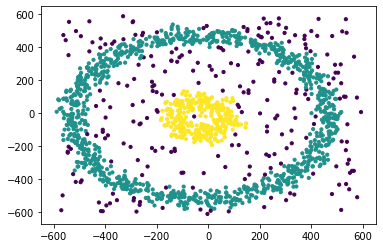

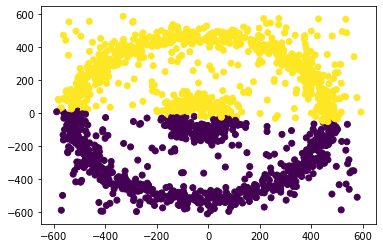

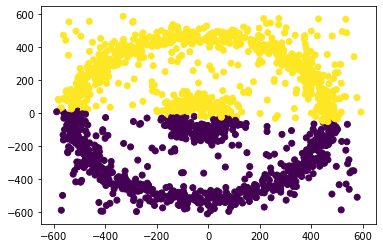

In [120]:
from sklearn.cluster import DBSCAN
data = np.array(df)
dbscan = DBSCAN(eps = 30,min_samples=6).fit(data)
labels = dbscan.labels_
plt.scatter(data[:, 0], data[:, 1], c=labels,s=10,cmap = 'viridis')

plt.show()
########################################################################
from sklearn.mixture import GaussianMixture as Gmm
gm = Gmm(n_components=2, random_state=0).fit(data)
labels = gm.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()

########################################################################
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
y = kmeans.fit_predict(data)
lbl = kmeans.predict(data)
plt.scatter(data[:,0],data[:,1],c=labels)
plt.show()

# **Fuzzy C-Means Based clustering**

1. Randomly initialize the centroids and clusters K, and compute the probability that each data point xi is a member of a given cluster k, P(point xi has label k|xi, k).

2. Iteration: Recalculate the centroids of the clusters as the weighted centroid given the probabilities of membership of all data points xi:

$$
\mu_k(n+1)=\frac{\sum_{x_i \in k} x_i * P\left(\mu_k \mid x_i\right)^b}{\sum_{x_i \in k} P\left(\mu_k \mid x_i\right)^b}
$$


3. Implement it on the data for which Kmeans was implemented. 

(400,)


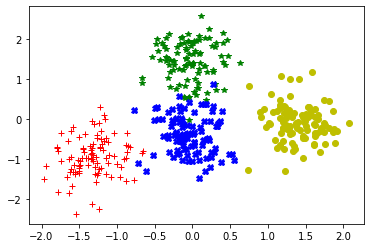

In [121]:

mu1=np.array([0.5,0])
mu2=np.array([5,5])
mu3=np.array([5,1])
mu4=np.array([10,1.5])

Sigma1=np.array([[1,0.9],[0.9,1]])
Sigma=np.array([[1,0],[0,1]])
f1=np.random.multivariate_normal(mu1,Sigma,100)
f2=np.random.multivariate_normal(mu2,Sigma,100)
f3=np.random.multivariate_normal(mu3,Sigma,100)
f4=np.random.multivariate_normal(mu4,Sigma,100)
F=np.concatenate((f1,f2,f3,f4))

F=(F-(np.mean(F,axis=0)))/(np.std(F,axis=0)) # data normalization
data=F

#Plotting
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']

lab1=np.zeros(f1.shape[0])
lab2=np.ones(f2.shape[0])
lab3=np.tile([2],f3.shape[0])
lab4=np.tile([3],f4.shape[0])
lab=np.concatenate((lab1,lab2,lab3,lab4))
print(lab.shape)

plt.figure()
for l in range(4):
    id=np.where(lab==l)
    
    plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])

iteration no : 0


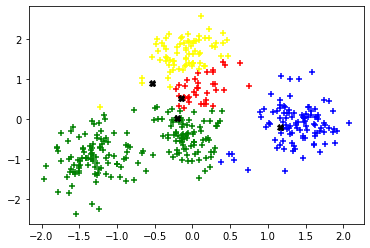

iteration no : 1


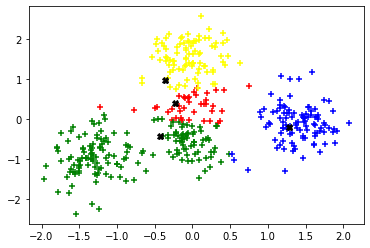

iteration no : 2


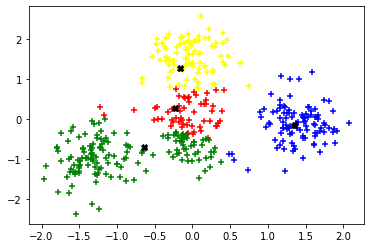

iteration no : 3


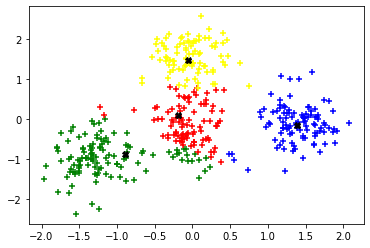

iteration no : 4


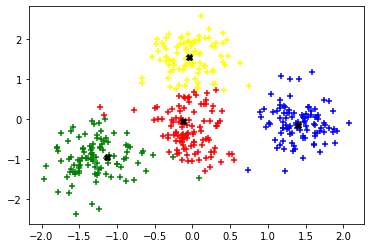

iteration no : 5


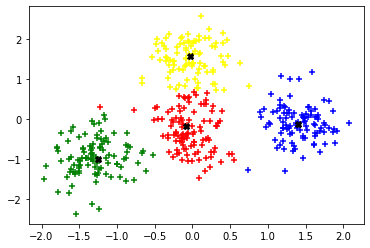

iteration no : 6


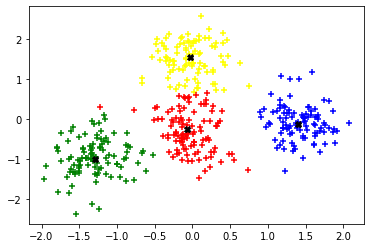

iteration no : 7


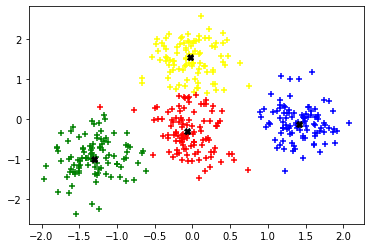

iteration no : 8


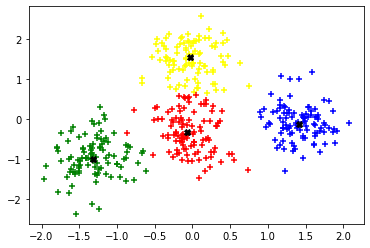

iteration no : 9


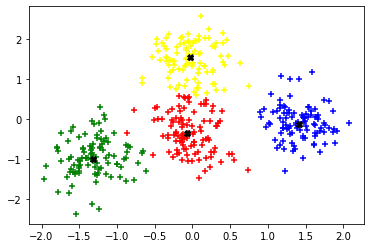

iteration no : 10


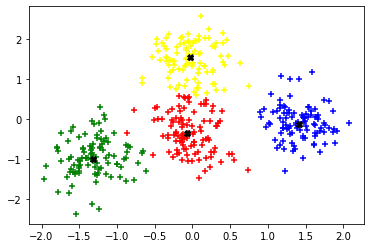

iteration no : 11


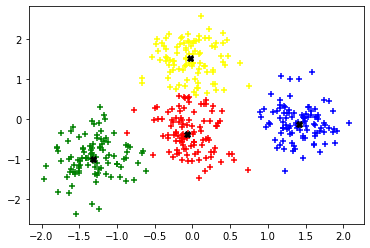

iteration no : 12


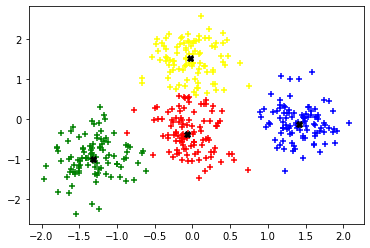

iteration no : 13


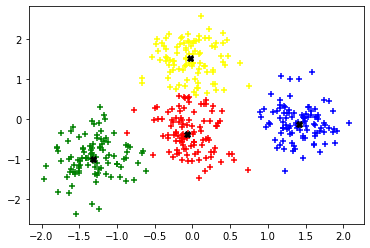

iteration no : 14


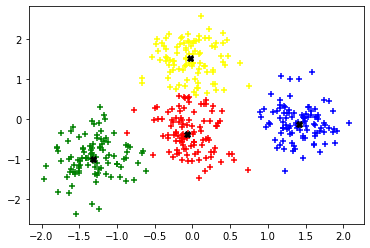

iteration no : 15


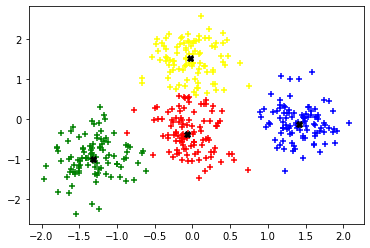

iteration no : 16


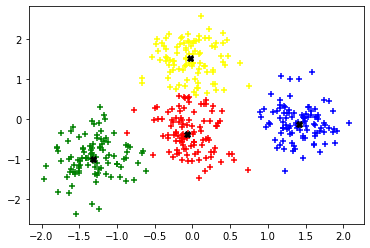

iteration no : 17


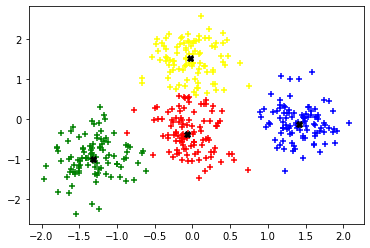

iteration no : 18


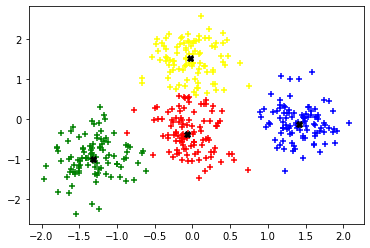

iteration no : 19


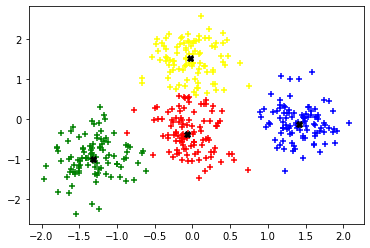

final clustering


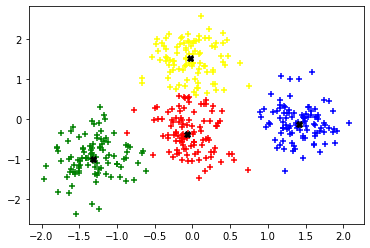

In [122]:
class FuzzyC:
    # works for only 2D
    """ TODO :
        1 ) first find c centers randomly and calc dist matr and membership matr
        2 ) find new centers
        3 ) find dist matrix
        4 ) find new membership matrix
        5) Do it till convergence
    """
    def __init__(self, C, data):
        self.C = C
        self.N = data.shape[0]
        self.data = data
        self.distMatrix = np.array([])
        self.centers = np.array([])
        self.MM = np.array([])
        self.colors = ['red', 'yellow', 'blue', 'green', 'black']
    def ED(self, x1, y1, x2, y2):
        x1 = x1-x2
        y1 = y1-y2
        return x1*x1 + y1*y1
    def meu(self, p, c):
        x = 0
        for i in range(self.C):
            x += self.distMatrix[c][p] / self.distMatrix[i][p]
        return 1 / x
    def cost(self):
        res = 0
        for p in range(self.N):
            res += np.sum(np.square(self.MM[:, p]) * self.distMatrix[:, p])
        return res
    def updateCenters(self):  # upadate center (mean) values
        self.centers = np.array([
            np.array([np.sum(np.square(self.MM[c, :]) * self.data[:, 0]) / np.sum(np.square(self.MM[c, :])), np.sum(np.square(self.MM[c, :]) * self.data[:, 1]) / np.sum(np.square(self.MM[c, :]))]) for c in range(self.C)
            ])
    def updateMM(self):   #Ck(i) values (soft cluster assignment)
        self.MM = np.array(
            [[ self.meu(p, c) for p in range(self.N)] for c in range(self.C)]
        )
    def updateDistM(self):
        self.distMatrix = np.array(
            [[ self.ED(p[0], p[1], c[0], c[1]) for p in self.data] for c in self.centers]
        )
    def doFCM(self):
        self.centers = np.array([np.array([np.random.randn(), np.random.randn()]) for i in range(self.C)])
        self.updateDistM()
        self.updateMM()

        curCost = self.cost()
        preCost = curCost + int(1e2)
        eps = 1e-6

        cnt=0
        #iterate till convergance
        while preCost-curCost >= eps:
            print("iteration no :", cnt)
            preCost = curCost
            self.updateCenters()
            self.updateDistM()
            self.updateMM()
            curCost = self.cost()
            self.showGraph()
            cnt+=1
    def showGraph(self):
        for p in range(self.N):
            cl = np.argmax(self.MM[:, p])
            plt.scatter(self.data[p][0], self.data[p][1], marker='+', color=self.colors[cl])
        plt.plot(self.centers[:,0],self.centers[:,1],'X',color='k')
        plt.show()

fcm = FuzzyC(4, data)
fcm.doFCM()
print("final clustering")
fcm.showGraph()

# Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.



## Agglomerative Clustering:

Lets start with some dummy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [123]:
import numpy as np
def Euclidian_Dist(x,y):
  return np.linalg.norm(x-y)

def Dist_mat(X):
  dist_mat = np.zeros((X.shape[1],X.shape[1]))
  for i in range(X.shape[1]):
    for j in range(X.shape[1]):
      dist_mat[i][j] = round(Euclidian_Dist(X[:,i],X[:,j]),1)
  return dist_mat

def combine(X):
  D_mat = Dist_mat(X)
  maxPossVal =np.inf
  D_mat[(D_mat==0)]=maxPossVal
  print(D_mat)
  minArr = np.min(D_mat, axis=0)
  #print(minArr)
  loc=np.argwhere(D_mat == np.min(minArr))
  loc=loc[0,:]
  #print(loc)
  print('Vector of X to be combined: ', loc+1)

  cluster_comb.append(loc+1)
  #print(loc[1])
  retendedX = X
  retendedX = np.delete(retendedX,max(loc),1)
  retendedX[:,min(loc)] = 0.5*(X[:,loc[0]]+X[:,loc[1]])
  

  newX = retendedX
  #print(newX)

  return newX


In [124]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X=X.transpose()

cluster_comb=[]
X1=X
print(X)
while X1.shape!=(2,1):
  X1 = combine(X1)

  print('\nMean of clusters after every iteration: \n\n',X1)


print('\ncluster combination order: \n\n',cluster_comb)

## velidate from inbuilt Dendogram

import plotly.figure_factory as ff



lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()

[[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
[[inf 1.  5.  6.4 7.4]
 [1.  inf 4.2 5.7 6.7]
 [5.  4.2 inf 1.4 2.5]
 [6.4 5.7 1.4 inf 1.1]
 [7.4 6.7 2.5 1.1 inf]]
Vector of X to be combined:  [1 2]

Mean of clusters after every iteration: 

 [[1.5 5.  6.  6.5]
 [1.  4.  5.  6. ]]
[[inf 4.6 6.  7.1]
 [4.6 inf 1.4 2.5]
 [6.  1.4 inf 1.1]
 [7.1 2.5 1.1 inf]]
Vector of X to be combined:  [3 4]

Mean of clusters after every iteration: 

 [[1.5  5.   6.25]
 [1.   4.   5.5 ]]
[[inf 4.6 6.5]
 [4.6 inf 2. ]
 [6.5 2.  inf]]
Vector of X to be combined:  [2 3]

Mean of clusters after every iteration: 

 [[1.5   5.625]
 [1.    4.75 ]]
[[inf 5.6]
 [5.6 inf]]
Vector of X to be combined:  [1 2]

Mean of clusters after every iteration: 

 [[3.5625]
 [2.875 ]]

cluster combination order: 

 [array([1, 2]), array([3, 4]), array([2, 3]), array([1, 2])]


# Clustering Algorithms on MNIST Digit dataset

Perform Kmeans and gmm clustering on MNIST dataset 


1. Load MNIST data from the given images and labels
2. Consider any 2 classes

In [125]:
!pip install idx2numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
!pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
import numpy as np
import matplotlib.pyplot as plt 
import keras
import tensorflow as tf

tf.keras.datasets.mnist.load_data(path="mnist.npz")
(Images, labels), (x_test, y_test) = keras.datasets.mnist.load_data()

In [129]:
import idx2numpy
from keras.utils import np_utils
img_path = '/content/t10k-images-idx3-ubyte'
label_path = '/content/t10k-labels-idx1-ubyte'

Images = idx2numpy.convert_from_file(img_path)
labels = idx2numpy.convert_from_file(label_path)



(1954, 784)
(1954,)


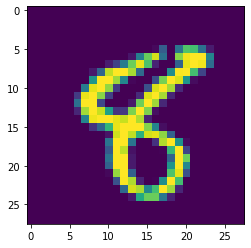

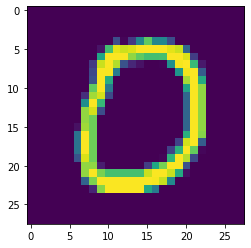

In [130]:
cl=[8,0]

# for class 8

id_8=np.where(labels==cl[0])
id8=id_8[0]

Im_8=Images[id8,:,:]
lab_8=labels[id8]

# for class 0
id_0=np.where(labels==cl[1])
id0=id_0[0]

Im_0=Images[id0,:,:]
lab_0=labels[id0]

plt.imshow(Im_8[1,:,:])
plt.figure()
plt.imshow(Im_0[1,:,:])



data=np.concatenate((Im_8,Im_0))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_8,lab_0))
print(G_lab.shape)




In [131]:
G_lab

array([8, 8, 8, ..., 0, 0, 0], dtype=uint8)

Use the K-means clustering algorithm from the last lab to form the clusters

In [132]:
# k-means

def K_means_clustering(data,K,itr,eps):
  # random initialization of clusters
  idx=np.random.randint(0,data.shape[0],K)
  Cents=data[idx,:]


# initialized a array to store distance, assigned label, minimum distance
  DAL=np.zeros((data.shape[0],K+2))
  error=[]
  F=data+10**(-20)   # added a small value as it is a sparse matrix(many values are zero)
  


  for n in range(itr):
# assignment stage
   for i in range(F.shape[0]):
      for j in range(K):
        DAL[i,j]=np.linalg.norm(F[i,:]-Cents[j,:])
        

      Dist=np.min(DAL[i,:K])
      
      ind=((np.where(Dist==DAL[i,:K])[0]))
      
      DAL[i,K]=ind.astype('int')
      DAL[i,K+1]=Dist

# re-estimation stage
   for i in range(K):
      ind=np.where(DAL[:,K]==i)
      
      if (F[ind,:][0].shape[0])==0:
        id1=np.random.randint(0,data.shape[0],1)
        Cents[i,:]=F[id1,:]
      else:
        Cents[i,:]=np.mean(F[ind,:][0],axis=0)


      

   error.append(np.mean(DAL[:,K+1]))  
   #print(Cents)



   if n>2:
      if abs(error[n]-error[n-1])<eps:
         break

   print(n)
   
  return DAL, Cents,error


0
1
2
3
4
5
6
7
8
9


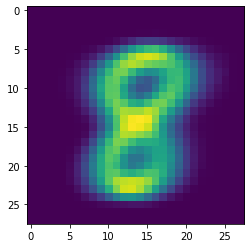

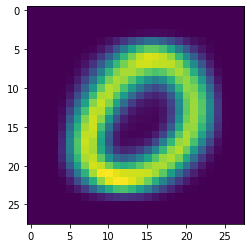

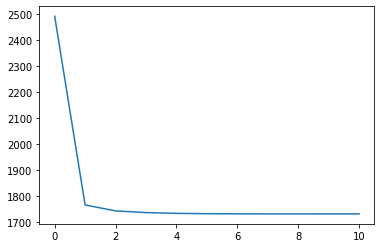

In [133]:
DAL,cents,error=K_means_clustering(data,2,200,10**(-20))

plt.imshow(np.reshape(cents[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(cents[1,:],(28,28)))

plt.figure()
plt.plot(error)

Use the GMM clustering algorithm from the last lab to form the clusters

In [134]:
from scipy.stats import multivariate_normal

Initialization 0
Initialization converged: True


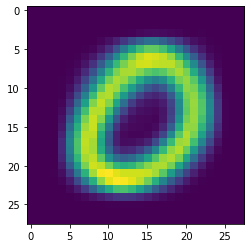

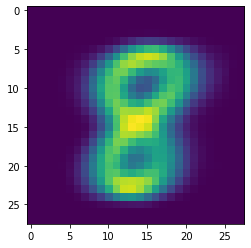

In [135]:
def initialization(data,K):
    mu = np.random.randint(min(data[:, 0]), max(data[:, 0]), size=(K, len(data[0])))
    cov = np.zeros((K, len(data[0]), len(data[0])))
    pi = np.ones(K)/K
    for n in range(len(cov)):
            np.fill_diagonal(cov[n], 1)
    theta = (mu,cov,pi)
    return theta

def E_Step_GMM(data,K,theta):
    mu, cov, pi = theta
    reg_cov = 1e-6*np.identity(len(data[0]))
    responsibility = np.zeros((len(data), len(mu)))

    for pic, muc, covc, r in zip(pi, mu, cov, range(len(responsibility[0]))):
        covc += reg_cov
        mn = multivariate_normal(mean=muc, cov=covc)
        responsibility[:, r] = pic*mn.pdf(data)

    for r in range(len(responsibility)):
        responsibility[r, :] = responsibility[r, :] / np.sum(responsibility[r, :])

    return responsibility

def M_Step_GMM(data,responsibility):
    mc = np.sum(responsibility, axis=0)
    pi = mc/np.sum(mc)
    mu = np.dot(responsibility.T, data) / mc.reshape(4,1)
    reg_cov = 1e-6*np.identity(len(data[0]))
    cov = []

    for r in range(len(pi)):
        covc = 1/mc[r] * (np.dot( (responsibility[:, r].reshape(len(data), 1)*(data-mu[r]) ).T, data - mu[r]) + reg_cov)
        cov.append(covc)

    cov = np.asarray(cov)
    
    likelihood_sum = np.sum([pi[r]*multivariate_normal(mu[r], cov[r] + reg_cov).pdf(data) for r in range(len(pi))])
    log_likelihood = np.sum(np.log(likelihood_sum))
    
    theta = (mu,cov,pi)
    return theta, log_likelihood
gmm=Gmm(n_components=2, init_params='kmeans',covariance_type='full',verbose=1)
gmm.fit(data)
gmm.get_params(deep=True)
means=gmm.means_
vars=gmm.covariances_
weights=gmm.weights_

im=np.reshape(means[0,:],(28,28))
plt.figure()
plt.imshow(im)

im=np.reshape(means[1,:],(28,28))
plt.figure()
plt.imshow(im)


In [136]:
# see the ck(i) values

fcm.MM[:,0] #of the zeroth element


array([0.16077344, 0.05275306, 0.03639848, 0.75007503])

In [137]:
fcm.centers # centroid vectors

array([[-0.07371205, -0.37095301],
       [-0.03493995,  1.530882  ],
       [ 1.4046116 , -0.11371062],
       [-1.32061754, -0.99491119]])